***
# <font color="grey">Problem Sheet 1 Part B - Solutions</font>
***
$\newcommand{\vct}[1]{\mathbf{#1}}$
$\newcommand{\mtx}[1]{\mathbf{#1}}$
$\newcommand{\e}{\varepsilon}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\minimize}{\text{minimize}\quad}$
$\newcommand{\maximize}{\text{maximize}\quad}$
$\newcommand{\subjto}{\quad\text{subject to}\quad}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\trans}{T}$
$\newcommand{\ip}[2]{\langle {#1}, {#2} \rangle}$
$\newcommand{\zerovct}{\vct{0}}$
$\newcommand{\diff}[1]{\mathrm{d}{#1}}$

### Solution to Problem 1.5

(a) The unit circle with respect to the $\infty$-norm is the square with corners $(\pm 1,\pm 1)^{\trans}$.

(b) The trick in transforming the unconstrained problem

\begin{equation*}
 \minimize \norm{\mtx{A}\vct{x}-\vct{b}}_{\infty}
\end{equation*}

into a constrained linear programming problem is to characterise the $\infty$-norm as the solution of a minimization problem. In fact, for any set of numbers $x_1,\dots,x_n$,

\begin{equation*}
 \max_{1\leq i\leq n} |x_i| = \min_{\forall i\colon |x_i|\leq t} t.
\end{equation*}

Put simply, the *maximum* of a set of non-negative numbers is the *smallest* upper bound on these numbers. We can further replace the condition $|x_i|\leq t$ by $-t\leq x_i\leq t$, so that the problem becomes

\begin{align*}
\mathop{\text{minimize}}_{(\vct{x},t)} \quad & t \\
\subjto & -t \leq \vct{a}_1^{\trans} \vct{x} - b_1 \leq t\\
& \cdots\\
& -t \leq \vct{a}_m^{\trans}\vct{x} - b_m \leq t,
\end{align*}

where $\mtx{a}_i^{\trans}$ are the rows of the matrix $\mtx{A}$. This problem can be brought into {\em standard form} by replacing each condition with the pair of conditions

\begin{align*}
 \vct{a}_i^{\trans}\vct{x}-t&\leq b_i\\
 -\vct{a}_i^{\trans}\vct{x}-t& \leq -b_i.
\end{align*}

The solution $\vct{x}$ of this problem can be read off the solution $(\vct{x},t)$ of the original problem.

### Solution to Problem 1.6

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [2]:
def graddesc(A, b, x, tol):
    # Compute the negative gradient r = A^T(b-Ax)
    r = np.dot(A.transpose(),b-np.dot(A,x))
    # Start with an empty array
    xout = [x]
    while la.norm(r,2) > tol:
        # If the gradient is bigger than the tolerance
        Ar = np.dot(A,r)
        alpha = np.dot(r,r)/np.dot(Ar,Ar)
        x = x + alpha*r
        xout.append(x)
        r = r-alpha*np.dot(A.transpose(),Ar)
    return np.array(xout).transpose()

In [3]:
A = np.array([[1,2], [2,1], [-1,0]])
b = np.array([10, -1, 0])
tol = 1e-4
x = np.zeros(2)

traj = graddesc(A, b, x, tol)

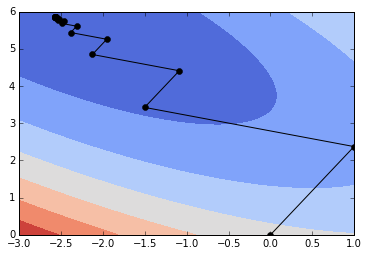

In [22]:
% matplotlib inline

# First create a contour plot to see where the minimum would be

# Define the function we aim to minimize
def f(x):
    return np.dot(np.dot(A,x)-b,np.dot(A,x)-b)

# Create a mesh grid 
xx = np.linspace(-3,1,100)
yy = np.linspace(0,6,100)
X, Y = np.meshgrid(xx, yy)
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = f(np.array([X[i,j], Y[i,j]]))

# Get a nice monotone colormap
cmap = plt.cm.get_cmap("coolwarm")

# Plot the contours and the trajectory
plt.contourf(X, Y, Z, cmap = cmap)
plt.plot(traj[0,:], traj[1,:], 'o-k')
plt.show()

### Solution to Problem 1.7

The gradient and the Hessian of the Rosenbrock function are

\begin{equation*}
  \nabla f(\vct{x}) = \begin{pmatrix}
  -400x_1(x_2-x_1^2)-2(1-x_1)\\
  200 (x_2-x_1^2)
  \end{pmatrix},
  \end{equation*}
  
  \begin{equation*}
  \nabla^2f(\vct{x}) = \begin{pmatrix}
  -400x_2+1200 x_1^2+2 & -400 x_1\\
  -400 x_1 & -400 x_1
  \end{pmatrix}
\end{equation*}

The point $(1,1)^{\trans}$ is a stationary point, as the gradient at this point vanishes. Moreover, with a computer program (Python or Matlab) one verifies that the eigenvalues of the Hessian matrix are positive, from which it follows that the matrix is positive definite. By the second order optimality conditions, it follows that $(1,1)^{\trans}$ is a local minimum. Moreover, it is the only local minimum, as there is no other point for which the gradient vanishes. The contour plot looks as follows.

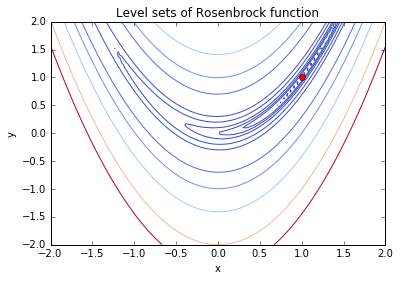

In [24]:
def rosenbrock(X, Y):
    return ((1-X)**2)+100*(Y-X**2)**2

xx = np.linspace(-2,2,100)
yy = np.linspace(-2,2,100)
X, Y = np.meshgrid(xx,yy)
Z = rosenbrock(X, Y)

%matplotlib inline
plt.figure()
levels = [0.1,0.5,1.0,2.0,5.0,10.0,50.0,100.0,200.0,400.0,600.0]
cmap = plt.cm.get_cmap("coolwarm")

cp = plt.contour(X,Y,Z,levels,cmap = cmap)

plt.title('Level sets of Rosenbrock function')
plt.xlabel('x')
plt.ylabel('y')
plt.plot([1],[1],'ro')
plt.show()